# Yash Meshram
# The Spark Foundation
# Data Science & Business Analytics

# Task 
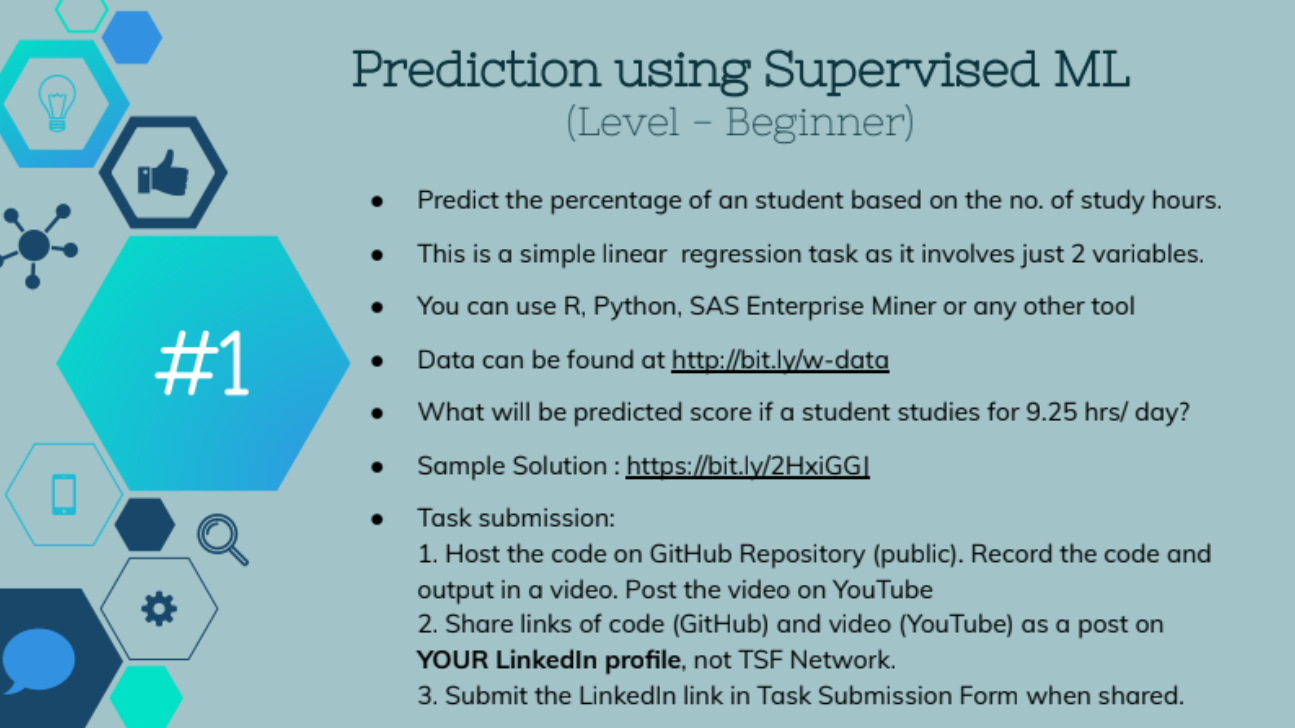

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

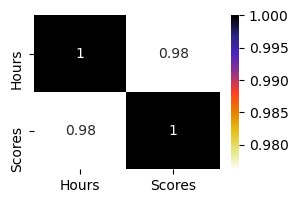

In [7]:
plt.figure(figsize=(3,2))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

# Notation
# x : features
# y : target

In [8]:
x = df.drop(['Scores'], axis='columns')
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [9]:
y = df.Scores
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

Text(0.5, 1.0, 'Study Hours v/s Percentage Score')

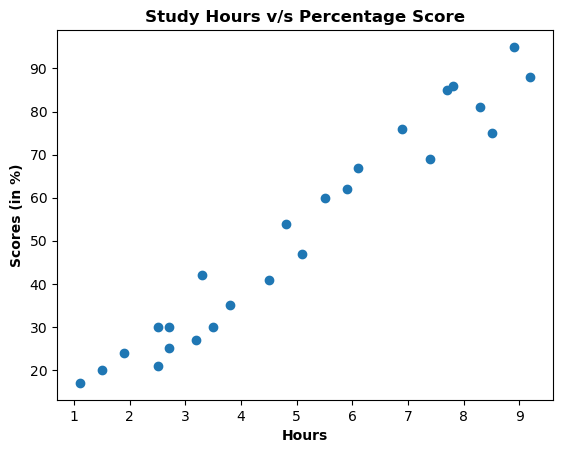

In [10]:
plt.scatter(x,y)
plt.xlabel('Hours', fontweight = 'bold')
plt.ylabel('Scores (in %)', fontweight = 'bold')
plt.title('Study Hours v/s Percentage Score', fontweight = 'bold')

Text(0.5, 1.0, 'Study Hours v/s Percentage Score')

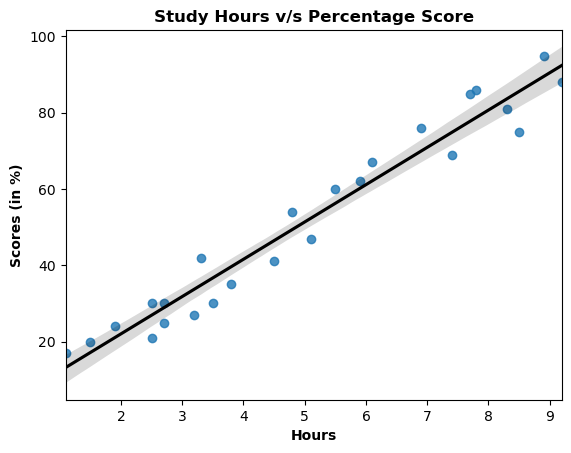

In [11]:
sns.regplot(x=x, y=y, line_kws = {'color' : 'k'})
plt.xlabel('Hours', fontweight = 'bold')
plt.ylabel('Scores (in %)', fontweight = 'bold')
plt.title('Study Hours v/s Percentage Score', fontweight = 'bold')

In [12]:
model = LinearRegression()

# Finding best value of random_state

Maximum Accuracy : 97.78 %
Random state value for max. accuracy : 26


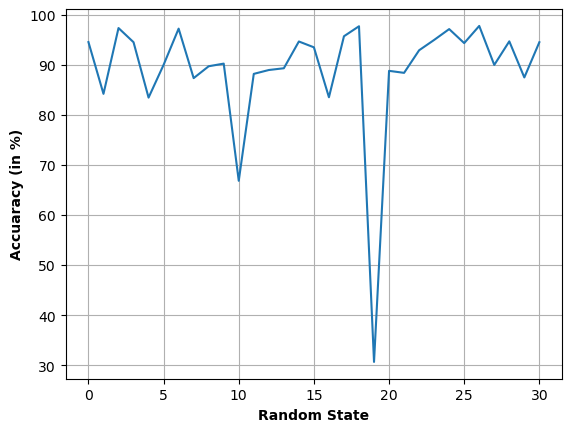

In [13]:
score = []
Range = range(31)
for i in Range:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i) 
    model.fit(x_train, y_train)
    score.append(model.score(x_test, y_test)*100)

plt.plot(Range, score)
plt.grid(True)
plt.xlabel('Random State', fontweight = 'bold')
plt.ylabel('Accuaracy (in %)', fontweight = 'bold')

print('Maximum Accuracy : {} %'.format(round(np.amax(score), 2)))
print('Random state value for max. accuracy :',np.argmax(score))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= np.argmax(score))

model.fit(x_train, y_train)

accuracy = round(model.score(x_test, y_test)*100, 2)
y_pred = model.predict(x_test)
error = metrics.mean_absolute_error(y_test, y_pred)

print('Accuracy : {} %'.format(accuracy))
print('Mean Absolue Error : ', round(error,2))

Accuracy : 97.78 %
Mean Absolue Error :  3.86


In [15]:
m = model.coef_
c = model.intercept_

print('Slope of Predicted line :', round(m[0], 2))
print('y-intercept of Predicted line :', round(c, 2))

Slope of Predicted line : 9.75
y-intercept of Predicted line : 2.47


Accuracy : 97.78 %
Mean Absolue Error :  3.86


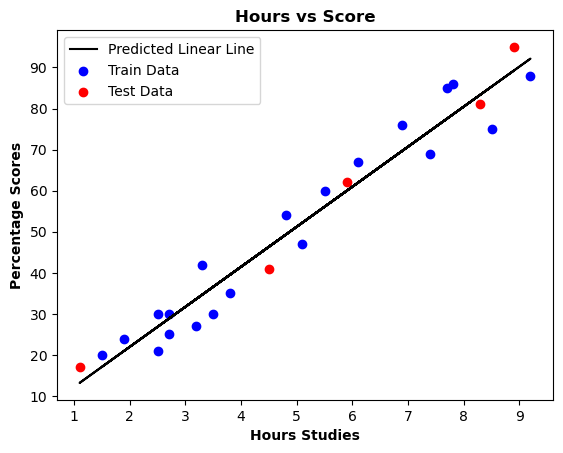

In [16]:
plt.scatter(x_train, y_train, color = 'blue', label='Train Data')
plt.scatter(x_test, y_test, color = 'red', label='Test Data')
plt.plot(x, m*x + c, color = 'black', label='Predicted Linear Line')

plt.xlabel('Hours Studies', fontweight = 'bold')
plt.ylabel('Percentage Scores', fontweight = 'bold')
plt.title('Hours vs Score', fontweight = 'bold')
plt.legend()

print('Accuracy : {} %'.format(accuracy))
print('Mean Absolue Error : ', round(error,2))

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
new_Hour = 9.25
new_Score = model.predict([[new_Hour]])

print('Hours =', new_Hour)
print('Score = {} %'.format(round(new_Score[0], 2)))

Hours = 9.25
Score = 92.64 %


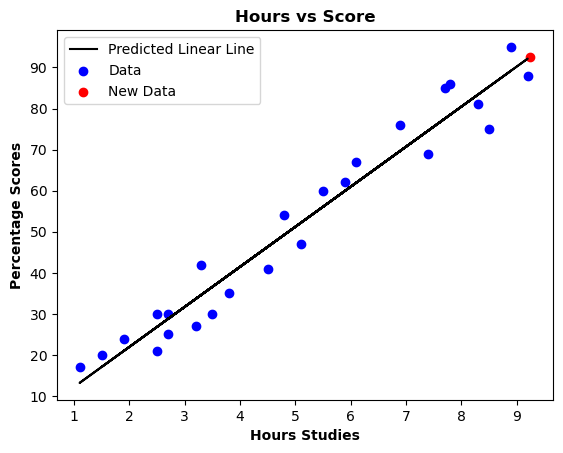

In [19]:
plt.scatter(x, y, color = 'blue', label='Data')
plt.plot(x, m*x + c, color = 'black', label='Predicted Linear Line')
plt.scatter(new_Hour, round(new_Score[0], 2), color = 'red', label='New Data')

plt.xlabel('Hours Studies', fontweight = 'bold')
plt.ylabel('Percentage Scores', fontweight = 'bold')
plt.title('Hours vs Score', fontweight = 'bold')
plt.legend()